In [216]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [217]:
def gen_data(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x+torch.randn(N,1)/2
    return x, y

In [218]:
def init_model(x,y):
    # build and train model
    ANNreg = nn.Sequential(
        nn.Linear(1,1), # input layer
        nn.ReLU(),      # nonlinear activation
        nn.Linear(1,1)  # output layer
    )
    lossfn = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=0.05)

    epochs = 500
    losses = torch.zeros(epochs)
    for epoch in range(epochs):
        yhat = ANNreg(x)
        loss = lossfn(yhat,y)
        losses[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNreg(x)
    return predictions,losses,ANNreg


# Test once

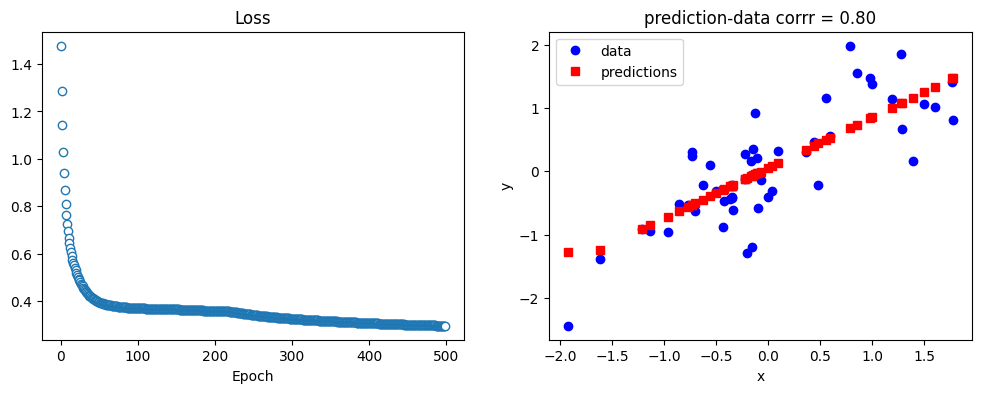

In [219]:
x,y = gen_data(.8)
yhat,losses,model = init_model(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(), 'o', markerfacecolor='w',linewidth=1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='data')
ax[1].plot(x,yhat.detach(),'rs',label='predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corrr = {np.corrcoef(yhat.detach().numpy().flatten(),y.numpy().flatten())[0,1]:.2f}')
plt.legend()

# Training Experiments

In [ ]:
slopes = np.linspace(-2,2,21)
EXP_N = 50

results = np.zeros((len(slopes),EXP_N,2))

for slope in range(len(slopes)):
    for N in range(EXP_N):
        x,y = gen_data(slopes[slope])
        yhat,losses,model = init_model(x,y)
        results[slope,N,0] = losses[-1]
        results[slope,N,1] = np.corrcoef(yhat.detach().numpy().flatten(),y.numpy().flatten())[0,1]

results[np.isnan(results)] = 0

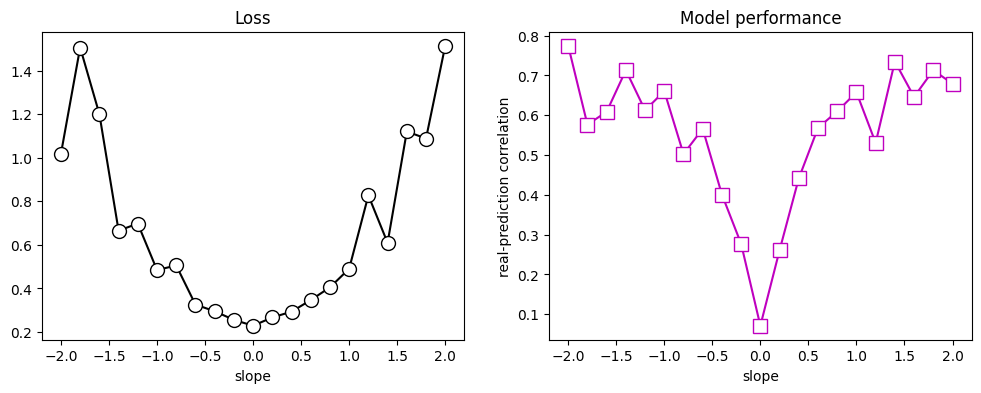

In [221]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('slope')
ax[1].set_ylabel('real-prediction correlation')
ax[1].set_title('Model performance')

plt.show()